In [1]:
import covasim as cv
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns

cv.options.set(dpi=100, show=False, close=True, verbose=0) # Standard options for Jupyter notebook

Covasim 3.1.1 (2021-12-06) — © 2021 by IDM


In [2]:
contact_dir = '/mnt/d/books/iitm/agentBased/codes/tn_contact_matrix/output/contact_matrix'
home_path = join(contact_dir, 'home_contact.csv')
school_path = join(contact_dir, 'school_contact.csv')
work_path = join(contact_dir, 'work_contact.csv')
community_path = join(contact_dir, 'community_contact.csv')

In [3]:
fb_dir = '/mnt/d/books/iitm/agentBased/codes/covasim/models/data/'
tile_path = join(fb_dir, 'tn_quadkey.csv')
density_path = join(fb_dir, 'pop_density.csv')
mobility_path = join(fb_dir, 'mobility_matrix.csv')

In [4]:
pars = dict(
    start_day = '2021-04-01',
    end_day = '2021-04-30',

    pop_type = 'matrix', # Use a more realistic population model
    location = 'India-TamilNadu', # Use population characteristics for Tamil-Nadu

    pop_size = 100_000,
    pop_scale = 2,
    rescale = True,
    pop_infected = 5000,

    home_matrix=home_path,
    school_matrix = school_path,
    work_matrix = work_path,
    community_matrix = community_path,

    tiles = tile_path,
    pop_density = density_path,
    mobility = mobility_path,

    use_waning = False,
    dynam_layer={'c': True},
    
    init_infection={'tiles':[0.4, 0.4] + [0.2/29]*29, 'ages':[0]*5 + [0.3]*2 + [0.4/9]*9},
    
    rand_seed=2
)

In [5]:
# Compare matrix model

pars['pop_type'] = 'matrix'
sim = cv.Sim(pars)
sim.run()

Sim(<no label>; 2021-04-01 to 2021-04-30; pop: 100000 matrix; epi: 30255⚙, 30☠)

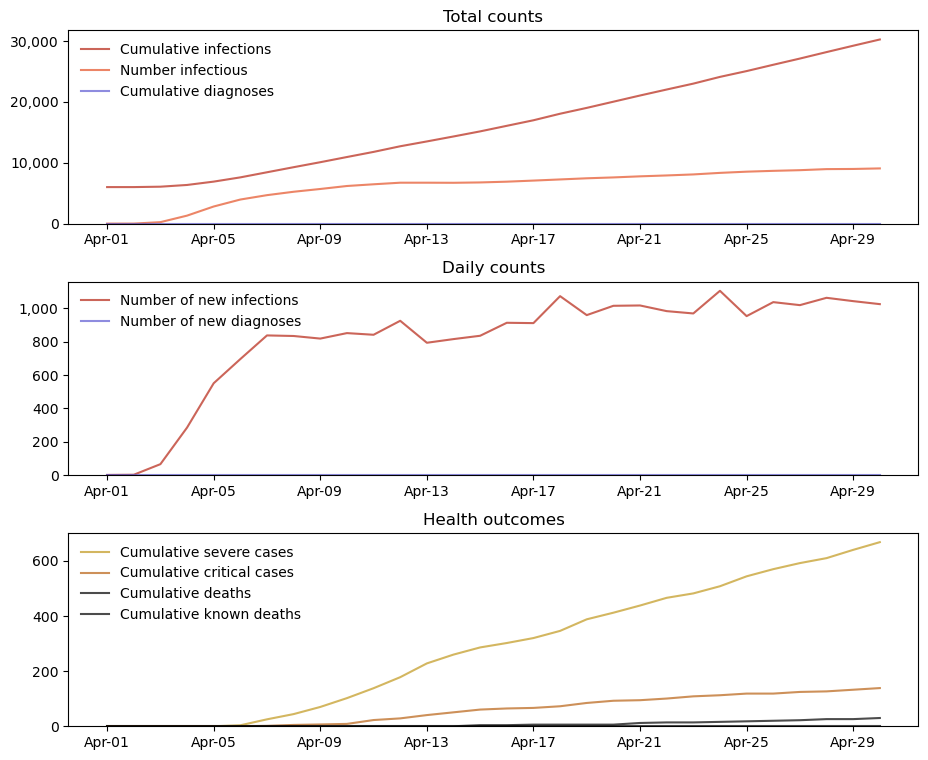

In [10]:
sim.plot()

In [5]:
# Compare hybrid model

pars['pop_type'] = 'hybrid'
pars['contacts'] = {'h':4,'s':10,'w':6,'c':10},

sim = cv.Sim(pars)
sim.run()

[ 6448 50680   814 20354 49224]


Sim(<no label>; 2021-04-01 to 2021-04-02; pop: 100000 hybrid; epi: 100⚙, 0☠)

In [6]:
hm = np.genfromtxt(home_path, delimiter=' ')

In [7]:
wm = np.genfromtxt(work_path, delimiter=' ')
wm.sum(axis=1)

array([0.        , 0.02009978, 0.06715793, 1.51666288, 3.56230619,
       5.87565966, 6.45756556, 6.98197331, 7.51767586, 6.47291291,
       6.60131934, 5.88003053, 3.6604147 , 2.54146393, 1.0526835 ,
       0.82703653])

In [8]:
sm = np.genfromtxt(school_path, delimiter=' ')
sm.sum(axis=1)

array([2.143303  , 9.22823777, 9.1279023 , 6.90019711, 0.90758055,
       0.04695974, 0.11402193, 0.09017596, 0.121294  , 0.21211401,
       0.32936892, 0.31311653, 0.11268262, 0.02438299, 0.        ,
       0.        ])

In [9]:
cm = np.genfromtxt(community_path, delimiter=',')
cm.sum(axis=1)

array([ 6.64938223,  8.44696249, 11.12899482, 14.11002874, 11.06223867,
        6.85237497,  5.18743544,  4.41114584,  3.55536578,  2.24051642,
        2.5807865 ,  2.18726942,  1.6515905 ,  1.39990898,  1.25203342,
        0.62490823])

In [ ]:
## School:
# 1. May be the actual school contacts are normalized by the total number of school going children. Verify?
# Sol: Implementation error 
# 2. How is matrix based school contact generation different from random contacts
# Sol: Done
# 3. Can we do some form of visualization using networkx